In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Datensatz laden
df = pd.read_csv('/workspaces/MA-bakery-sales-prediction/0_DataPreparation/df_merged_umsatz_kiwo01_wetter_wochentage.csv')

# Datentypen sicherstellen
df['Datum'] = pd.to_datetime(df['Datum'])

# NaN-Werte entfernen (für einfache Analyse, alternativ Imputation nutzen)
df = df.dropna()

# Ziel- und Eingangsvariablen definieren
X = df[['Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'KielerWoche', 'Warengruppe']]
y = df['Umsatz']

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineare Regression trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen
y_pred = model.predict(X_test)

# Modell bewerten
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Koeffizienten anzeigen
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


Mean Squared Error: 19663.684591827103
R^2 Score: 0.05837465265663244
               Feature  Coefficient
0           Temperatur     4.295960
1  Windgeschwindigkeit     0.764841
2           Bewoelkung    -0.515891
3          KielerWoche    26.650308
4          Warengruppe    -4.101685


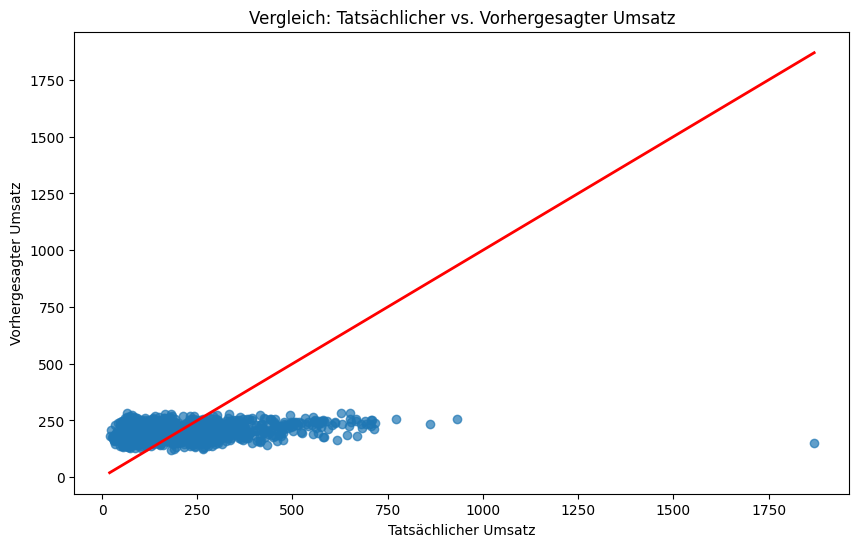

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Tatsächlicher Umsatz")
plt.ylabel("Vorhergesagter Umsatz")
plt.title("Vergleich: Tatsächlicher vs. Vorhergesagter Umsatz")
plt.show()


In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Ziel- und Eingangsvariablen definieren
X = df[['Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'KielerWoche', 'Warengruppe']]
y = df['Umsatz']

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineares Modell initialisieren
model = LinearRegression()

# Rekursive Feature-Elimination durchführen
rfe = RFE(estimator=model, n_features_to_select=3)  # Anzahl der gewünschten Features
rfe.fit(X_train, y_train)

# Features auswählen
selected_features = X_train.columns[rfe.support_]
print("Ausgewählte Features:", selected_features)

# Modell mit ausgewählten Features trainieren
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

# R^2 und adjustiertes R^2 berechnen
n = len(y_test)
k = len(selected_features)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

print("R^2 Score:", r2)
print("Adjustiertes R^2:", adjusted_r2)

# Modellbewertung
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
})
print(coefficients)



Ausgewählte Features: Index(['Temperatur', 'KielerWoche', 'Warengruppe'], dtype='object')
R^2 Score: 0.06057918138636331
Adjustiertes R^2: 0.05856325688290054
       Feature  Coefficient
0   Temperatur     4.380385
1  KielerWoche    26.384888
2  Warengruppe    -4.123012


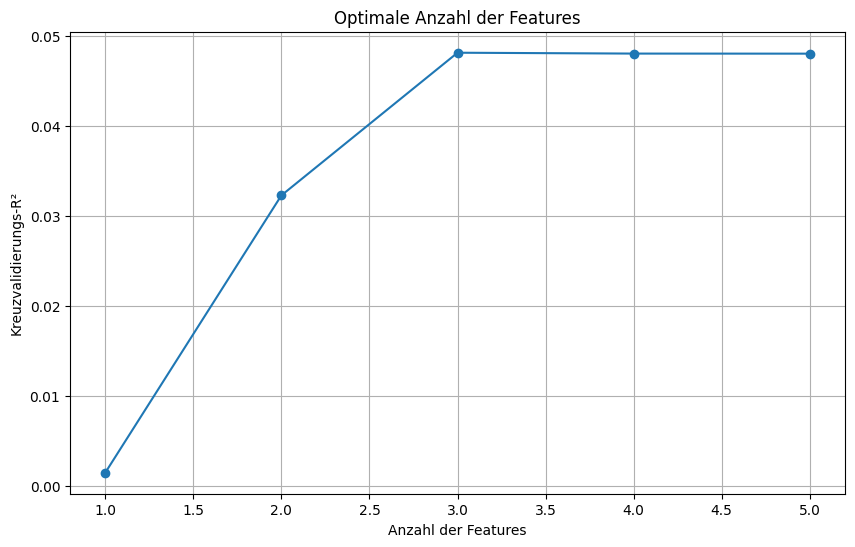

Optimale Anzahl der Features: 3


In [6]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# RFECV initialisieren
model = LinearRegression()
rfecv = RFECV(estimator=model, step=1, scoring='r2', cv=5, min_features_to_select=1)
rfecv.fit(X_train, y_train)

# Visualisierung der RFECV-Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),  # Anzahl der Features
    rfecv.cv_results_['mean_test_score'],                    # Kreuzvalidierungs-Score
    marker='o'
)
plt.title("Optimale Anzahl der Features")
plt.xlabel("Anzahl der Features")
plt.ylabel("Kreuzvalidierungs-R²")
plt.grid()
plt.show()

# Beste Anzahl von Features
print("Optimale Anzahl der Features:", rfecv.n_features_)



In [7]:
from sklearn.ensemble import RandomForestRegressor

# Trainiere ein Random Forest Modell
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Zeige die Wichtigkeit der Features an
feature_importance = rf_model.feature_importances_

# Ausgabe der Features und deren Wichtigkeit
for feature, importance in zip(X_train.columns, feature_importance):
    print(f'{feature}: {importance}')


Temperatur: 0.24189124751231492
Windgeschwindigkeit: 0.07419896924317437
Bewoelkung: 0.04450393041312542
KielerWoche: 0.0038653471580688582
Warengruppe: 0.6355405056733165


In [8]:
pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 60.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import statsmodels.api as sm
import pandas as pd

# Angenommen, df ist der Datensatz und 'Umsatz' ist die Zielvariable
# X sind die Features (die unabhängigen Variablen), y ist die Zielvariable
X = df[['Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'KielerWoche', 'Warengruppe']]  # Beispiel-Features
y = df['Umsatz']  # Zielvariable

# Füge einen konstanten Term für das Intercept hinzu (d.h. die "1" in der linearen Gleichung)
X = sm.add_constant(X)

# Führe die lineare Regression durch
model = sm.OLS(y, X).fit()

# Zeige die Zusammenfassung des Modells
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     80.18
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           4.41e-82
Time:                        23:19:09   Log-Likelihood:                -44411.
No. Observations:                7009   AIC:                         8.883e+04
Df Residuals:                    7003   BIC:                         8.888e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 160.1127    

In [6]:
# Import necessary libraries
import pandas as pd  # For data manipulation and handling
import statsmodels.formula.api as smf  # For statistical modeling

# read data as df (df_dataset_complete.csv) in _data_prepared
df_training = pd.read_csv('/workspaces/MA-bakery-sales-prediction/_data_prepared/df_training.csv')

In [8]:
# Fit a linear regression model
# - 'umsatz' is the dependent variable (target) we aim to predict.
# - 'x' represents other variables.
# - 'C(condition)' treats the 'condition' feature as a categorical variable.
mod = smf.ols('Umsatz ~ Brot + Broetchen + Croissant + Konditorei + Kuchen + Saisonbrot + national_holiday + christmas_market + KielerWoche + Schifffahrt + bewoelkt_bins_bewoelkt_1mäßig_3_5 + bewoelkt_bins_bewoelkt_2stark_6_8 + Monat + temp_bins_kalt + temp_bins_mild + temp_bins_warm + temp_bins_heiß + wind_bins_Wind + wind_bins_Sturm + Wettercode_2_leichter_niederschlag + Wettercode_3_starker_niederschlag + Wettercode_4_gewitter + Wochentag_Di + Wochentag_Mi + Wochentag_Do + Wochentag_Fr + Wochentag_Sa + Wochentag_So', data=df_training).fit()

# Output the summary of the fitted model
# The summary includes key metrics such as R-squared, coefficients, and p-values.
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                 2.164e+04
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:42:29   Log-Likelihood:            -1.1441e+06
No. Observations:              200297   AIC:                         2.288e+06
Df Residuals:                  200269   BIC:                         2.289e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Nicht-numerische Spalten: Index(['Wettercode_cat', 'Wettercode_cat_condensed'], dtype='object')


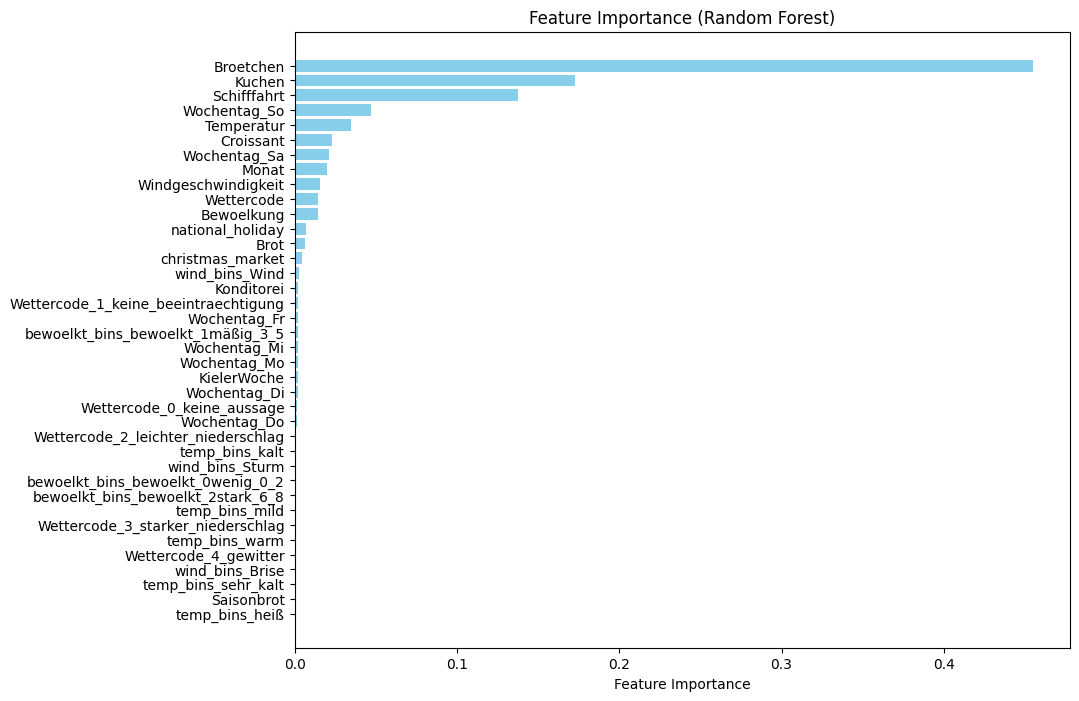

In [10]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Features und Ziel definieren
X = df_training.drop(columns=['Umsatz', 'Datum'])  # Entferne Ziel und Datumsspalte
y = df_training['Umsatz']

# Prüfen auf nicht-numerische Daten
non_numeric_cols = X.select_dtypes(include=['object', 'string']).columns
print("Nicht-numerische Spalten:", non_numeric_cols)

# Entferne oder kodieren nicht-numerische Spalten
# Option 1: Entfernen nicht-numerischer Spalten
X = X.drop(columns=non_numeric_cols)

# Option 2: One-Hot-Encoding für kategoriale Spalten (wenn sie relevant sind)
# X = pd.get_dummies(X, columns=non_numeric_cols)

# Trainiere den Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Plot der Feature-Bedeutsamkeit
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()
